<a href="https://colab.research.google.com/github/ifeomare/kwk-bwdc-md/blob/updated_files/Yelp_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###PREPARING FOR THE LESSON

**Import the necessary Librarys**
⬇              

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

**Importing data**

1) Upload your final project CSV file to Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

2) Store your dataset in a DataFrame. Remember to change DATASET and NAME_OF_FILE!

In [ ]:
import io
yelp = pd.read_csv(io.BytesIO(uploaded['black_results_updated.csv']))
# Dataset is now stored in a Pandas Dataframe

###EXPLORATORY DATA ANALYSIS
**Exploratory Data Analysis (EDA)** is an approach to analyzing datasets to summarize their main characteristics. With the initial inspection, we want to identify issues to address while cleaning.

*Some helpful functions:*

DATASET.shape 		→ describe the shape of the DataFrame

DATASET.head(n)		→ display the top n rows

DATASET.info()		→ display column types and missing values

DATASET.describe()	→ display summary statistics

In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             38 non-null     object 
 1   alias          38 non-null     object 
 2   name           38 non-null     object 
 3   image_url      36 non-null     object 
 4   is_closed      38 non-null     bool   
 5   url            38 non-null     object 
 6   review_count   38 non-null     int64  
 7   categories     38 non-null     object 
 8   rating         38 non-null     float64
 9   coordinates    38 non-null     object 
 10  transactions   38 non-null     object 
 11  price          15 non-null     object 
 12  location       38 non-null     object 
 13  phone          36 non-null     float64
 14  display_phone  36 non-null     object 
 15  distance       38 non-null     float64
 16  attributes     38 non-null     object 
dtypes: bool(1), float64(3), int64(1), object(12)
memory usag

In [ ]:
yelp.describe().sum()

review_count    5.220866e+02
rating          5.598306e+01
phone           8.877122e+10
distance        5.390069e+03
dtype: float64

In [ ]:
yelp.shape

(38, 17)

In [ ]:
yelp.head


<bound method NDFrame.head of                         id                                              alias  \
0   _-kMik32dINn2Xas6YvRzA                            the-ivy-hotel-baltimore   
1   hQ7P1QmGAQ3Ks7MYJnfCDw                      soul-kuisine-cafe-baltimore-2   
2   KwurOIbMLjJXLG65bVDafw                            posis-kitchen-baltimore   
3   -jZZEKPf-TVZqCly9n-Ndw        black-acres-roastery-open-works-baltimore-3   
4   PtDb2vf4H3Zk04r3xzCjMw              magdalena-a-maryland-bistro-baltimore   
5   ObGJ1gEwa8uzZyp7-1bs4g               the-green-house-juice-cafe-baltimore   
6   svctnw5lum1vaTDagaub9g                            beauty-plus-baltimore-3   
7   CtHGALUoofDKRqqCfxbafQ                       sophomore-coffee-baltimore-2   
8   Zxj4PhLtrWUTaNsyN0bkWA                           dodahs-kitchen-baltimore   
9   MFvW61k93X-h88zvPgsPrQ                                 flourish-baltimore   
10  lW_UxROvdjymg41X3s54PA                        taste-this-balt-baltimore-2   
11  qZx7sf7JnviW51vUVEGlTA                                cafe-1908-baltimore   
12  etdAtkzZpYiizLJb_yFpFQ                           diaspora-salon-baltimore   
13  Ch3EbKdMFd6PI9yZRvP-bg                      tightfisted-fashion-baltimore   
14  mtj4YqsJeqw0ltudUJlczg  the-purple-peach-nail-weave-and-lash-bar-balti...   
15  Ggwk4YdG8cRZgEbh_RiH3Q                      k-stewart-the-salon-baltimore   
16  Z4t19tbM8lLysRAnHIp_Kw                           avenue-station-baltimore   
17  QJi1OYOyc6jYZ5fGdPhzcQ                          eat-drink-relax-baltimore   
18  m5_xwACUll2BVSsfnSU1VQ                         sominbo-wellness-baltimore   
19  oa0ZA3jmmHQ32WdiTkmCFw                             terra-cafe-baltimore-3   
20  AKjBIYLu4nkym8oKY3G10w                       yanni-the-designer-baltimore   
21  8uuRe9y3NBPwk060ud-Urw                           noni-therapy-baltimore-2   
22  6FQcLjjFumm8JN17jygoRA                           beezwax-beauty-baltimore   
23  CXUaspBrybGftiuJ4a_1Sw                             cp-retention-baltimore   
24  PLK4HtrrSOGwO3W1z-JXDA                      nights-over-egypt-baltimore-2   
25  vGKLFrjYL8fKQa-wthy-Zg             empowerment-to-begin-again-baltimore-5   
26  xCXigVrd0jKM2iVXscDdiw                             lotus-bhrs-baltimore-2   
27  VTkfY8HMKleLlr-1slS2jQ                                     xgr8-baltimore   
28  gX7EVbmgNpC3xCKBvRiWFQ         empowering-minds-resource-center-baltimore   
29  A-nK7XNpdTgLQ3pfiazD8w               patton-healthcare-services-baltimore   
30  YmZ9pcmwGTc4QFUncXFVnA                     curvy-silk-sculpting-baltimore   
31  2Rr_8pKkLq3DnE-tvIeHkw                        massages-by-loren-baltimore   
32  H4JNwHYzJegXF03DWosx9Q                           luxe-rich-beau-baltimore   
33  9k-It2GvRaQpx3kLqE3pzg                               all-family-baltimore   
34  jPLGZ8oBwCcJcmOFmiTuFg                           the-beauty-bar-baltimore   
35  4_7bLm_l2PYJQTVGNO48rA                          costella-roy-el-baltimore   
36  KwurOIbMLjJXLG65bVDafw                            posis-kitchen-baltimore   
37  diICtFf5J-KGBAJy8Zxpjw               dukem-ethiopian-restaurant-baltimore   

                                      name  \
0                            The Ivy Hotel   
1                        Soul Kuisine Cafe   
2                           Posi's Kitchen   
3        Black Acres Roastery - Open Works   
4              Magdalena A Maryland Bistro   
5               The Green House Juice Cafe   
6                              Beauty Plus   
7                         Sophomore Coffee   
8                          Dodah's Kitchen   
9                                 Flourish   
10                         Taste This Balt   
11                               Cafe 1908   
12                          Diaspora Salon   
13                     Tightfisted Fashion   
14  The Purple Peach Nail Weave & Lash Bar   
15                    K. Stewart the Salon   
16                          

In [ ]:
from google.colab import files
files.download('dreaddit-test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###TRY IT!!

Perform an initial inspection of your final project data using these methods:

*   DATASET.shape
*   DATASET.shape
*   DATASET.head()
*   DATASET.info()
*   DATASET.describe()

**Note:** Be sure to change DATASET to the name you used to import your dataset to your Colab notebook.

Insert code cell below!

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)

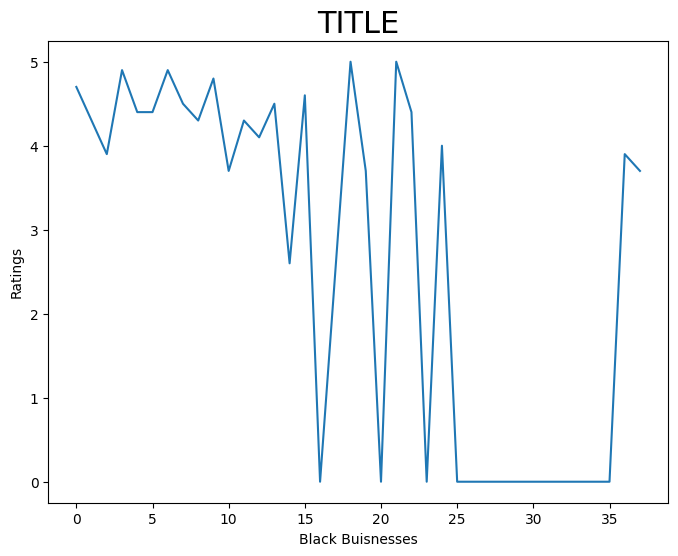

In [ ]:
plt.figure()
plt.plot(yelp['rating'])
plt.xlabel('Black Buisnesses')
plt.ylabel('Ratings')
plt.title('TITLE', fontsize = 22)
plt.show()

### ✅DATA CLEANING CHECKLIST ✅ :check

---



#### Columns and Rows ☑

**What:** Check for spelling errors in column names, and change any column names as necessary for clarity.

**How:**
rename() → Method that accepts a dictionary or function to apply to the column or index names.
DATASET.rename(columns = {'OLD NAME':'NEW NAME'}, inplace = True)


**What:** Check to see if any rows or columns need to be dropped.

**How:**
drop() = DataFrame method to drop specific columns or rows by label.
DATASET.drop([‘COLUMN_NAME’], axis = 1, inplace = True)
DATASET.drop([‘ROW_NAME’], axis = 0, inplace = True)


In [ ]:
yelp.drop(columns=['price'], inplace=True)

In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             38 non-null     object 
 1   alias          38 non-null     object 
 2   name           38 non-null     object 
 3   image_url      36 non-null     object 
 4   is_closed      38 non-null     bool   
 5   url            38 non-null     object 
 6   review_count   38 non-null     int64  
 7   categories     38 non-null     object 
 8   rating         38 non-null     float64
 9   coordinates    38 non-null     object 
 10  transactions   38 non-null     object 
 11  location       38 non-null     object 
 12  phone          36 non-null     float64
 13  display_phone  36 non-null     object 
 14  distance       38 non-null     float64
 15  attributes     38 non-null     object 
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 4.6+ KB


#### Data Types ☑
**What:** Check that all datatypes are correct (ex: money as a float).

**How:**
astype() = Method to convert a DataFrame or Pandas Series to a specified data type.
DATASET['COL_NAME'] = DATASET['COL_NAME'].astype(DATA_TYPE)


#### Duplicates ☑
**What:** Check to see if any rows are duplicates.


**How:**
duplicated() = Method to identify duplicate rows via a boolean series.
DATASET.duplicated()
DATASET.duplicated().sum()
drop_duplicates() = DataFrame Method that removes duplicate rows.
DATASET.drop_duplicates()

In [ ]:
yelp.duplicated()
yelp.duplicated().sum()
yelp.drop_duplicates()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,attributes
0,_-kMik32dINn2Xas6YvRzA,the-ivy-hotel-baltimore,The Ivy Hotel,https://s3-media2.fl.yelpcdn.com/bphoto/q4q047...,False,https://www.yelp.com/biz/the-ivy-hotel-baltimo...,67,"[{'alias': 'hotels', 'title': 'Hotels'}]",4.7,"{'latitude': 39.3035166638629, 'longitude': -7...",[],"{'address1': '205 E Biddle St', 'address2': ''...",1.410515e+10,(410) 514-6500,723.944191,"{'business_temp_closed': None, 'waitlist_reser..."
1,hQ7P1QmGAQ3Ks7MYJnfCDw,soul-kuisine-cafe-baltimore-2,Soul Kuisine Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/tCwAdx...,False,https://www.yelp.com/biz/soul-kuisine-cafe-bal...,113,"[{'alias': 'soulfood', 'title': 'Soul Food'}]",4.3,"{'latitude': 39.31088, 'longitude': -76.61357}","['delivery', 'pickup']","{'address1': '203 E North Ave', 'address2': ''...",1.410540e+10,(410) 539-7685,430.790001,"{'business_temp_closed': None, 'menu_url': Non..."
2,KwurOIbMLjJXLG65bVDafw,posis-kitchen-baltimore,Posi's Kitchen,https://s3-media1.fl.yelpcdn.com/bphoto/_T0oA5...,False,https://www.yelp.com/biz/posis-kitchen-baltimo...,23,"[{'alias': 'african', 'title': 'African'}, {'a...",3.9,"{'latitude': 39.301710079197505, 'longitude': ...","['delivery', 'pickup']","{'address1': '1010 Saint Paul St', 'address2':...",1.410244e+10,(410) 244-0009,963.353947,"{'business_temp_closed': None, 'menu_url': 'ht..."
3,-jZZEKPf-TVZqCly9n-Ndw,black-acres-roastery-open-works-baltimore-3,Black Acres Roastery - Open Works,https://s3-media2.fl.yelpcdn.com/bphoto/WfJ6lh...,False,https://www.yelp.com/biz/black-acres-roastery-...,23,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.9,"{'latitude': 39.306133828493174, 'longitude': ...",['delivery'],"{'address1': '1400 Greenmount Ave', 'address2'...",1.410498e+10,(410) 497-7553,350.697617,"{'business_temp_closed': None, 'menu_url': 'ht..."
4,PtDb2vf4H3Zk04r3xzCjMw,magdalena-a-maryland-bistro-baltimore,Magdalena A Maryland Bistro,https://s3-media1.fl.yelpcdn.com/bphoto/UhX8Fi...,False,https://www.yelp.com/biz/magdalena-a-maryland-...,163,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,"{'latitude': 39.303409504941, 'longitude': -76...",[],"{'address1': '205 E Biddle St', 'address2': ''...",1.410514e+10,(410) 514-0303,728.976626,"{'business_temp_closed': None, 'menu_url': '',..."
5,ObGJ1gEwa8uzZyp7-1bs4g,the-green-house-juice-cafe-baltimore,The Green House Juice Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/rQ6x11...,False,https://www.yelp.com/biz/the-green-house-juice...,128,"[{'alias': 'vegan', 'title': 'Vegan'}, {'alias...",4.4,"{'latitude': 39.3172610505369, 'longitude': -7...","['delivery', 'pickup']","{'address1': '2431 St Paul St', 'address2': ''...",1.410889e+10,(410) 889-1391,1034.224940,"{'business_temp_closed': None, 'menu_url': Non..."
6,svctnw5lum1vaTDagaub9g,beauty-plus-baltimore-3,Beauty Plus,https://s3-media4.fl.yelpcdn.com/bphoto/UNkU0o...,False,https://www.yelp.com/biz/beauty-plus-baltimore...,56,"[{'alias': 'cosmetics', 'title': 'Cosmetics & ...",4.9,"{'latitude': 39.3135963857557, 'longitude': -7...",[],"{'address1': '2107 N Charles St', 'address2': ...",1.410685e+10,(410) 685-0955,804.843706,"{'business_temp_closed': None, 'menu_url': Non..."
7,CtHGALUoofDKRqqCfxbafQ,sophomore-coffee-baltimore-2,Sophomore Coffee,https://s3-media1.fl.yelpcdn.com/bphoto/4IHNx-...,False,https://www.yelp.com/biz/sophomore-coffee-balt...,61,"[{'alias': 'coffeeroasteries', 'title': 'Coffe...",4.5,"{'latitude': 39.315077, 'longitude': -76.618002}",['delivery'],"{'address1': '2223 Maryland Ave', 'address2': ...",NaN,NaN,1004.578493,"{'business_temp_closed': None, 'menu_url': Non..."
8,Zxj4PhLtrWUTaNsyN0bkWA,dodahs-kitchen-baltimore,Dodah's Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/msgHJV...,False,https://www.yelp.com/biz/dodahs-kitchen-baltim...,63,"[{'alias': 'vegan', 'title': 'Vegan'}, {'alias...",4.3,"{'latitude': 39.303855389047534, 'longitude': ...",

#### Strings ☑
**What:** Check to see if any strings need to be cleaned and if any values need to be replaced.

**How:**
strip() = Removes spaces at the beginning and end, and removes any characters included inside parentheses.
DATASET[‘COL_NAME’] = DATASET[‘COL_NAME’].str.strip('CHAR_TO_REMOVE')
replace() = Method to replace a value with another value
DATASET[‘COL_NAME’] = DATASET[‘COL_NAME’].str.replace('VALUE1', VALUE2)


#### Missing Values ☑
**What:** Check for missing values and replace with specified value if necessary.

**How:**
isna() = Detects missing values
DATASET.isna().sum()
fillna() = Replaces the NULL values with a specified value
DATASET.fillna('NA', inplace=True)

**Note: If you fill NULL values with a string, this may change the datatypes of your columns.**


In [ ]:
yelp.isna().sum()

id               0
alias            0
name             0
image_url        2
is_closed        0
url              0
review_count     0
categories       0
rating           0
coordinates      0
transactions     0
location         0
phone            2
display_phone    2
distance         0
attributes       0
dtype: int64

In [ ]:
yelp.to_csv('black_results_updated.csv', index=False)
from google.colab import files
files.download('black_results_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DISPLAYING CORRELATIONS

**Import Data**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Bandladesh survey - Sheet1.csv to Bandladesh survey - Sheet1.csv


In [ ]:
import io
serv2 = pd.read_csv(io.BytesIO(uploaded['Bandladesh survey - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
serv2 = serv2.drop(columns=['3. Which device do you usually use to connect social media?', '4. Which type of internet connection do you use?','5. How long have you been using a social media account?','8. When do you usually use social media?',
       '9. How many friends do you have on social media?',
       '10. How many friends do you know personally in social media?',
       '11. How many groups you are tagged in social media?'])

NameError: name 'serv2' is not defined

###Data Visualization

Visualization is a great way to get an overall idea of how the data is behaving. These are the two main visualization tools we are going to use:

**Matplotlib:** one of the most commonly used graphing tools, produces static plots

**Seaborn:** focuses on visualizing statistical graphs, built on top of Matplotlib!

#### Calculating Correlation Coefficient

In [ ]:
yelp.corr()

ValueError: could not convert string to float: '_-kMik32dINn2Xas6YvRzA'

### Creating a Heatmap

We can visualize the correlation coefficient matrix using a heat map. Let's try it using Seaborn:

<ipython-input-13-6474886cb2f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Kaggle.corr())


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

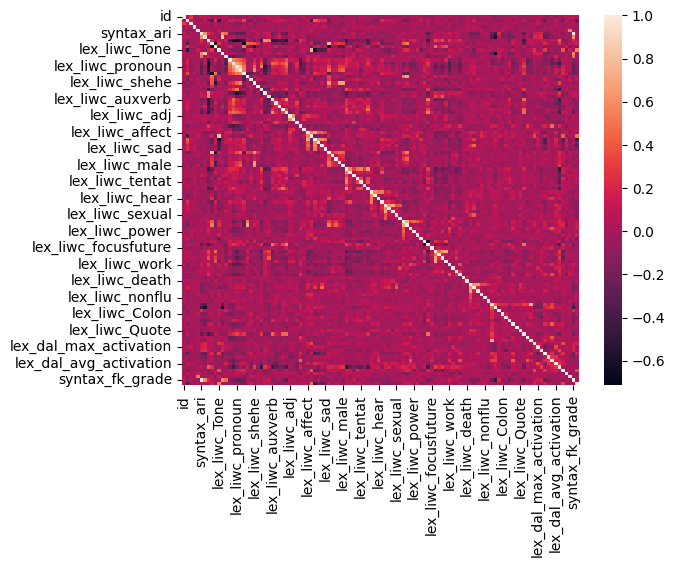

In [ ]:
import seaborn as sns
sns.heatmap(Kaggle.corr())
sns.heatmap


# PLOTTING IN PYTHON

In this part of the section we’ll get to explore creating visualizations with **Matplotlib**!

In order to do this, we’ll need to first import the library, then tell it to show the graphs we make inside the notebooks (instead of opening in a separate window or program):

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

We’ll also set the size of the figure here:

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

### Matplotlib Basic Syntax

**Line Plot**


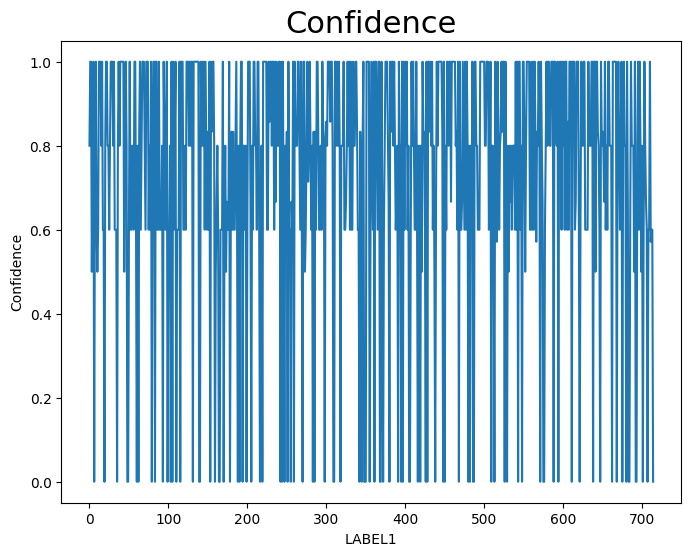

In [ ]:
plt.figure()
plt.plot(Kaggle['confidence'])
plt.xlabel('LABEL1')
plt.ylabel('Confidence')
plt.title('Confidence', fontsize = 22)
plt.show()

# plt.plot(Kaggle['social_upvote_ratio'], Kaggle['confidence'])

**Scatterplot**

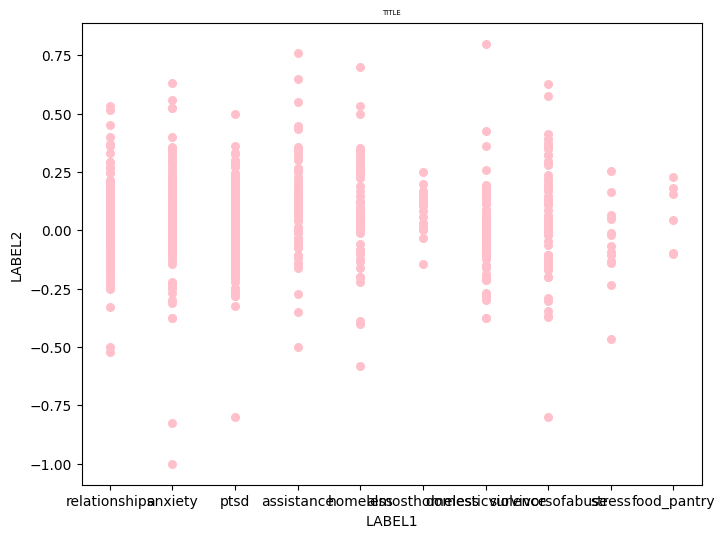

In [ ]:
plt.figure()
plt.scatter(Kaggle['subreddit'], Kaggle['sentiment'], color = 'pink', s = 30)#(x,y)
plt.xlabel('Mental Health')
plt.ylabel('Level of Severity')
plt.title('Mental Health Symptoms', fontsize = 5)
plt.show()

# plt.scatter(Kaggle['Budget (float)'], disney['Running time (int)'], color = 'BLUE', s = 30)

**Histogram**

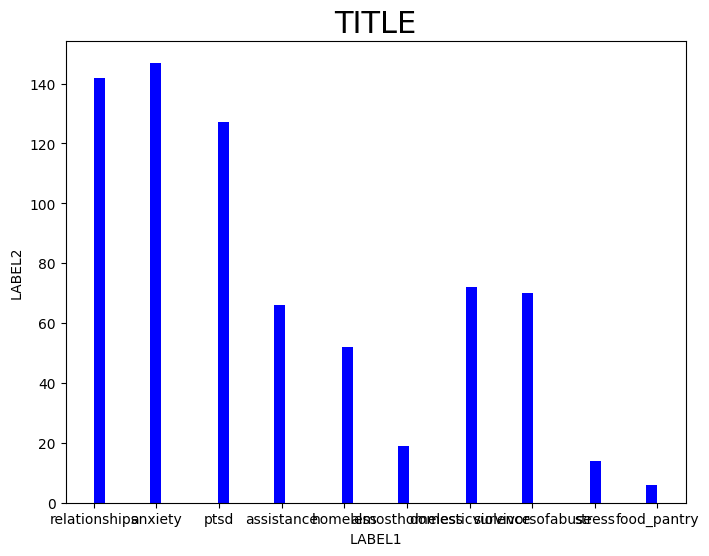

In [ ]:
plt.figure()
plt.hist(Kaggle['subreddit'], bins = 50, color='BLUE')(x,y)
plt.xlabel('LABEL1')(x)
plt.ylabel('LABEL2')(y)
plt.title('TITLE', fontsize = 22)
plt.show()

**Bar Chart**

In [ ]:
plt.figure()
plt.bar(disney['Production company'].value_counts().index,
 disney['Production company'].value_counts().values)
plt.xlabel('LABEL 1')
plt.ylabel('LABEL2')
plt.title('TITLE', fontsize = 22)
plt.show()

For more in-depth explanation for each graph checkout the [Curriculum Page](https://datascience.kodewithklossy.com/13-final-project-data-cleaning-statistics) ◀ or this cheat sheet [HERE](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png) ◀